In [207]:
import numpy as np
import pandas as pd
import plotly.express as px # Interactive charts and save some coding; .express - high-level api
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# Change settings to improve default style (optional)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [209]:
data_path = r'/workspaces/BigData/inputs/raw_data/medical-charges.csv'

In [210]:
medical_df = pd.read_csv(data_path)

In [211]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [212]:
print(medical_df['charges'].corr(medical_df['age']))
print(medical_df['charges'].corr(medical_df['bmi']))
print(medical_df['charges'].corr(medical_df['children']))

0.2990081933306476
0.19834096883362878
0.06799822684790469


In [213]:
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df['smoker'].map(smoker_values)
medical_df['charges'].corr(smoker_numeric)

np.float64(0.7872514304984782)

In [214]:
medical_df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


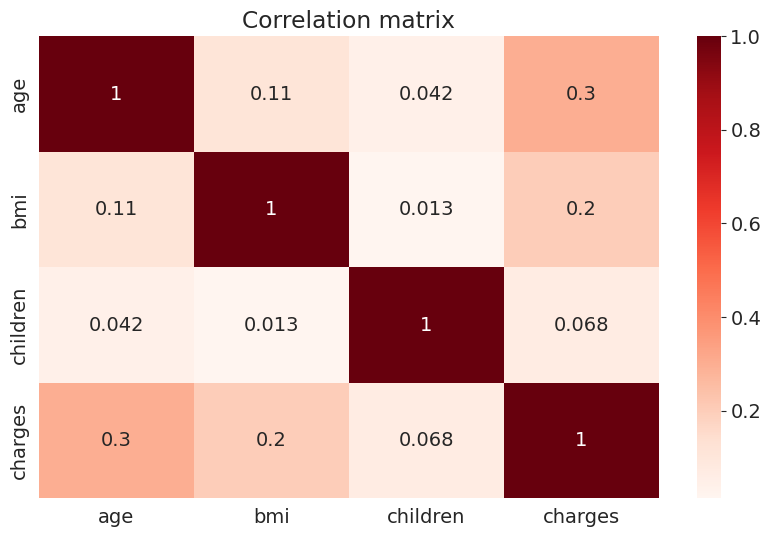

In [215]:
sns.heatmap(
    medical_df.select_dtypes(include='number').corr(),
    cmap='Reds',
    annot=True    
)
plt.title("Correlation matrix")
plt.show()

In [216]:
from sklearn.linear_model import LinearRegression

In [217]:
model = LinearRegression()  # Create a model variable and assign linear regression model to it


In [218]:
help(model.fit)


Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [219]:
non_smoker_df = medical_df[medical_df['smoker'] == 'no'] # Either line will work. Just different syntaxes; But I like no 1 more.
non_smoker_df.head(3)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [220]:
inputs = non_smoker_df[['age']] # required to be 2D array. We want a dataframe, not a series.
targets = non_smoker_df['charges'] # There is only one dependent variable => no 2D notation is required.
print("Inputs shape", inputs.shape) # Output: (1064, 1) -> First number is how many lines; 2nd number is how many columns.
print("targets", targets.shape)

Inputs shape (1064, 1)
targets (1064,)


In [221]:
model.fit(inputs, targets)


LinearRegression()

In [222]:
model.predict(np.array([
    [23],
    [37],
    [61]
]))

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [223]:
predictions = model.predict(inputs)
print(predictions)

[2719.0598744  5391.54900271 6727.79356686 ... 2719.0598744  2719.0598744
 3520.80661289]


In [224]:
def rmse(targets, predictions):
    """
    Returns RMSE for targets and prediction values.
    """
    return np.sqrt(np.mean(np.square(predictions - targets)))

In [225]:
rmse(targets, predictions) # Output USD 4662.5. Meaning on average we are away from the target by this number.


np.float64(4662.505766636395)

In [226]:
# w:
print(model.coef_)
# b:
print(model.intercept_)

[267.24891283]
-2091.4205565650864


<Axes: xlabel='smoker', ylabel='charges'>

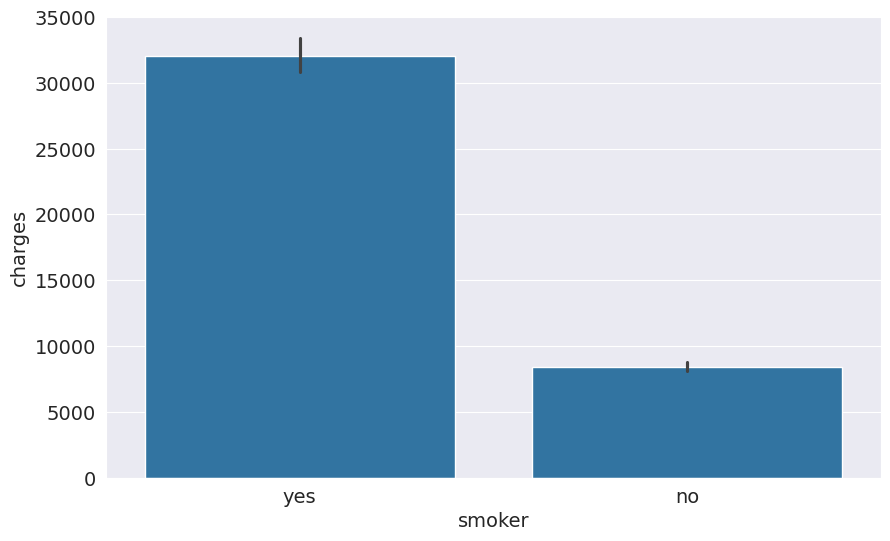

In [227]:
sns.barplot(data=medical_df, x='smoker', y='charges')

In [228]:
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [229]:
medical_df['charges'].corr(medical_df['smoker_code'])

np.float64(0.7872514304984782)

In [230]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [231]:
# Create inputs and targets
inputs = medical_df[['age', 'bmi', 'children', 'smoker_code']]
targets = medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

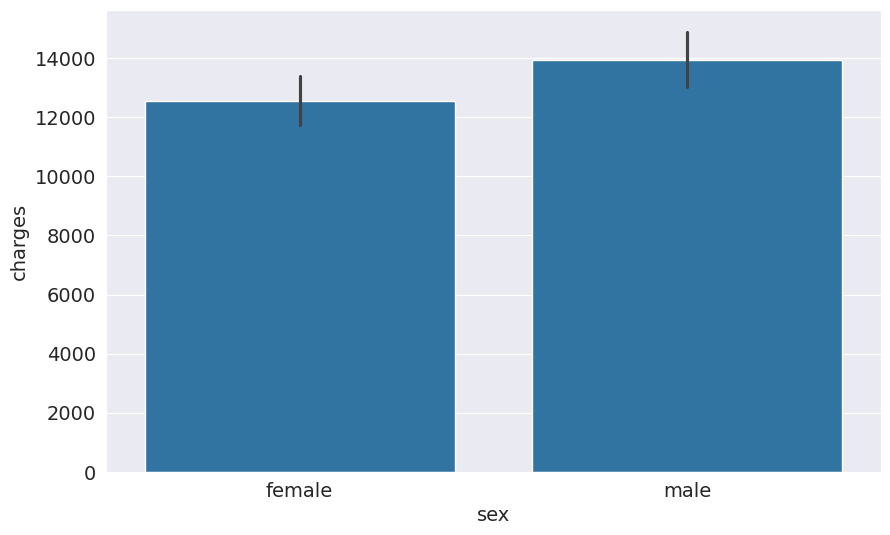

In [232]:
sns.barplot(data=medical_df, x='sex', y='charges')

In [233]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df['charges'].corr(medical_df['sex_code'])

np.float64(0.05729206220202531)

In [234]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.100708754546


In [235]:
medical_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='region', ylabel='charges'>

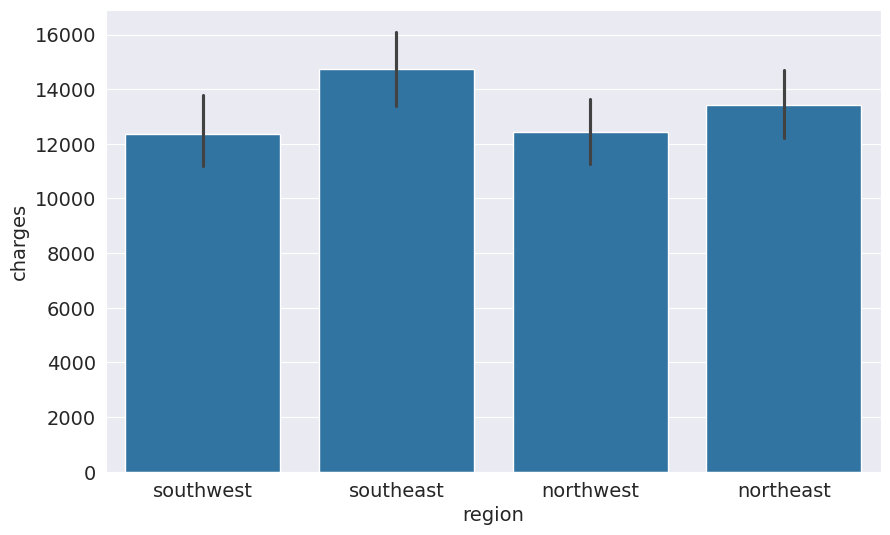

In [236]:
sns.barplot(data=medical_df, x='region', y='charges')

In [237]:
from sklearn import preprocessing

In [238]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [239]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [240]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [241]:
medical_df.head()


,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0


In [242]:
# Create inputs and targets
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.6796511744515


In [243]:
from sklearn.model_selection import train_test_split


In [244]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)


In [245]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 6679.342530805274


In [246]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 5970.469377040908


In [247]:
john_smith = {
	"age": [30],             # Example age
    "bmi": [29.5],           # Example BMI
    "children": [2],         # Example number of children
    "smoker_code": [1],      # Smoker (1 for yes, 0 for no)
    "sex_code": [1],         # Male (1), Female (0)
    "northeast": [0],        # One-hot encoded region:
    "northwest": [1],
    "southeast": [0],
    "southwest": [0]
}

In [248]:
single_person = pd.DataFrame(john_smith)
single_person.head()

,age,bmi,children,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,30,29.5,2,1,1,0,1,0,0


In [249]:
single_prediction = model.predict(single_person)
print(f"Predicted health insurance charge for John Smith is {single_prediction[0]:.1f} USD")

Predicted health insurance charge for John Smith is 29938.2 USD


In [250]:
residuals = targets_train - predictions_train  # Compute residuals (errors)
std_dev = np.std(residuals)  # Compute the standard deviation of residuals
confidence_interval = 1.96 * std_dev  # Confidence interval (for 95% confidence level, 1.96 standard deviations)

# Make a single prediction
# single_prediction = model.predict(single_person)[0]

# Compute lower and upper bounds for prediction interval
lower_bound = single_prediction - confidence_interval
upper_bound = single_prediction + confidence_interval

print(f"Predicted value: {single_prediction}")
print(f"95% Prediction Interval: ({lower_bound}, {upper_bound})")

Predicted value: [29938.23955064]
95% Prediction Interval: ([18236.11957164], [41640.35952964])
